In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('data/Train.csv',encoding='latin1',parse_dates=['DOB','Lead_Creation_Date'])

In [3]:
#usuwamy kolumne LoggedIn
data.drop(['LoggedIn'],axis=1,inplace=True)

In [4]:
#kolumna ID to identyfikator klienta i usuwamy ja od razu
data.drop(['ID'],axis=1,inplace=True)

In [5]:
y = data['Disbursed']
X = data.drop(['Disbursed'],axis=1)

In [6]:
y.value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

(array([85747.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1273.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

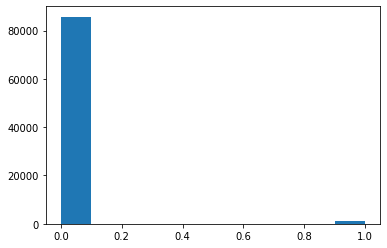

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y)

In [8]:
y.shape

(87020,)

In [9]:
100 - (np.count_nonzero(y)/y.shape[0])*100

98.53711790393012

In [10]:
y.shape[0]/np.count_nonzero(y)

68.35820895522389

In [11]:
data[data['Disbursed'] > 0]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
183,Male,Delhi,43000,1980-12-31,2015-05-01,200000.0,3.0,8902.0,INDIA INTERNATIONAL CENTER,Central Bank of India,...,3.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,1
317,Male,Delhi,37200,1992-11-03,2015-05-01,400000.0,4.0,0.0,ZS ASSOCIATES INDIA PVT LTD,Citibank,...,4.0,15.35,2000.0,11203.4,N,Web-browser,B,S133,4,1
362,Female,Pune,500000,1980-02-05,2015-05-01,500000.0,5.0,20000.0,AMDOCS DEVELOPMENT CENTRE INDIA PVT LTD,ICICI Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,3,1
453,Female,Delhi,150000,1974-04-19,2015-05-01,1000000.0,3.0,11000.0,STRATEGIC ANALYSIS INDIA PVT LTD,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,3,1
519,Male,Firozpur,27000,1979-11-16,2015-05-01,200000.0,5.0,0.0,DEPARTMENT OF POST,NaN,...,5.0,16.50,2500.0,4916.9,Y,Web-browser,B,S133,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86818,Male,Delhi,160000,1985-01-25,2015-07-31,1000000.0,5.0,50000.0,ESCORT LTD,ICICI Bank,...,5.0,NaN,NaN,NaN,N,Web-browser,G,S122,3,1
86822,Male,Mumbai,64000,1985-05-12,2015-07-31,500000.0,5.0,12401.0,SANDESH BANDODE,ICICI Bank,...,5.0,NaN,NaN,NaN,N,Web-browser,G,S122,3,1
86872,Male,Jaipur,45000,1990-12-30,2015-07-31,0.0,0.0,0.0,MANKIND PHARMA LTD,State Bank of India,...,4.0,13.75,8100.0,22033.0,Y,Mobile,G,S122,5,1
86938,Female,Kolkata,105000,1982-11-23,2015-07-31,0.0,2.0,62418.0,IBM INDIA PVT LTD,Kotak Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,1


## Analiza danych

In [12]:
def plot_qq(X,column):
    import seaborn_qqplot as sqp
    from scipy.stats import gamma
    sqp.qqplot(X,
                x=column,
                y=gamma,
                aspect=2.5,
                height = 4,
                display_kws={"identity":True} 
          )
    plt.title("QQ Plot "+column)
    plt.show()

In [13]:
def calc_missing_values(column):
    #liczba brakujacych danych
    x_total = column.shape[0]
    x_missing = column.isnull().sum()
    print('missing percentage: '+str((x_missing/x_total)*100))

In [14]:
def print_stats(data):
    numerical_columns = []
    categorical_columns = []
    for column in data:
        x_total = data[column].shape[0]
        x_missing = data[column].isnull().sum()
        missing_percentage = 100*(x_missing/x_total)
        if data.dtypes[column] == np.int64 or data.dtypes[column]==np.float64:
            #print(f"{column}\t{missing_percentage:.2f}\t{data[column].mean():.2f}\t{data[column].median():.2f}")
            numerical_columns.append([column,missing_percentage,data[column].mean(),data[column].median(),data[column].skew()])
        elif data.dtypes[column] == np.object:
            #print(f"{column}\t{missing_percentage:.2f}\t{data[column].mode()[0]}")
            categorical_columns.append([column,missing_percentage,data[column].mode()[0]])
    print(pd.DataFrame(numerical_columns,columns=['NAME','PERCENTAGE_MISSING','MEAN','MEDIAN','SKEW']))
    print(pd.DataFrame(categorical_columns,columns=['NAME','PERCENTAGE_MISSING','MODE']))

In [15]:
def outliers_detection(X,feature):
        # Q1 25 percentyl
        Q1 = np.percentile(X[feature],25)
        print(r'Q1 {}',Q1)
        # Q3 - 75 percentyl
        Q3 = np.percentile(X[feature],75)
        print(r'Q3 {}',Q3)
        #IQR = Q3 - Q1
        step = 1.5*(Q3 - Q1)

        x_outliers = X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))]
    
        display(x_outliers)
        return x_outliers

    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []

# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

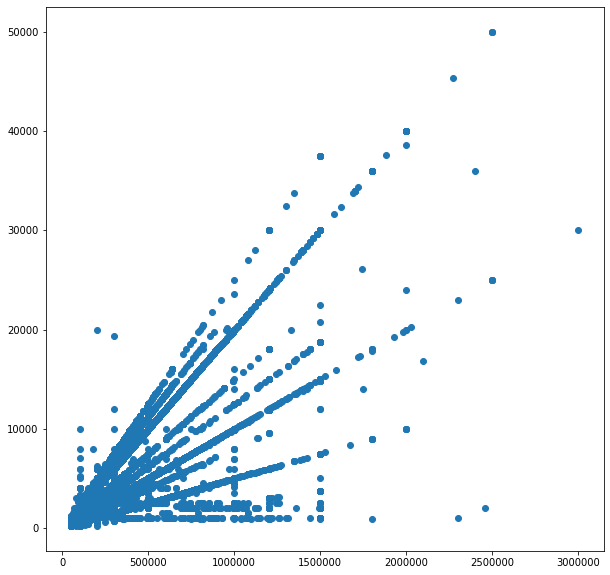

In [16]:
#wyswietl wszystkie dla ktorych nan jest dla Processing_Fee a nie ma go dla Loan_Amout_sumbite
#X[X['Processing_Fee'].isnull() & X['Loan_Amount_Submitted'].notnull() ]
plt.figure(figsize=(10,10))
plt.scatter(X['Loan_Amount_Submitted'],X['Processing_Fee'])
#plt.yscale('log')

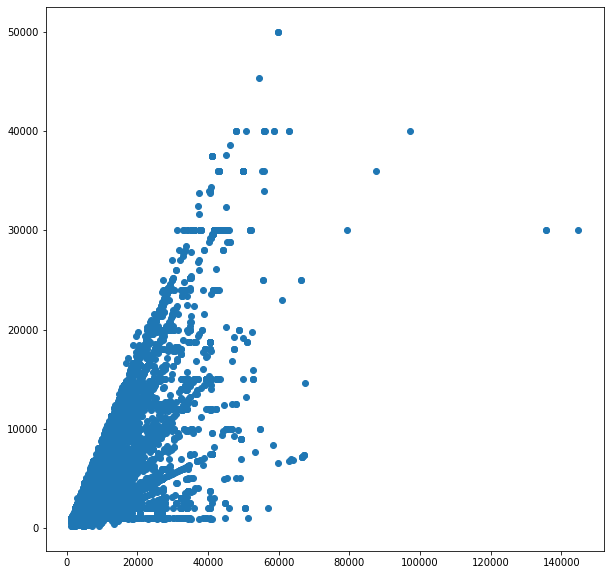

In [17]:
#wyswietl wszystkie dla ktorych nan jest dla Processing_Fee a nie ma go dla Loan_Amout_sumbite
#X[X['Processing_Fee'].isnull() & X['Loan_Amount_Submitted'].notnull() ]
plt.figure(figsize=(10,10))
plt.scatter(X['EMI_Loan_Submitted'],X['Processing_Fee'])
#plt.yscale('log')

In [18]:
pd.set_option('expand_frame_repr', False)
print_stats(X)

                     NAME  PERCENTAGE_MISSING           MEAN     MEDIAN        SKEW
0          Monthly_Income            0.000000   58849.974351   25000.00  167.560526
1     Loan_Amount_Applied            0.081590  230250.699928  100000.00    5.641871
2     Loan_Tenure_Applied            0.081590       2.131399       2.00    0.264624
3            Existing_EMI            0.081590    3696.227824       0.00  211.769351
4                    Var5            0.000000       4.961503       2.00    0.760606
5   Loan_Amount_Submitted           39.775914  395010.590188  300000.00    2.104984
6   Loan_Tenure_Submitted           39.775914       3.891369       4.00   -0.843323
7           Interest_Rate           68.138359      19.197474      18.00    1.430301
8          Processing_Fee           68.490002    5131.150839    4000.00    2.680109
9      EMI_Loan_Submitted           68.138359   10999.528377    9392.97    2.754955
10                   Var4            0.000000       2.949805       3.00    0

In [19]:
X['Monthly_Income'].skew()

167.56052617705805

In [20]:
#typy zmiennych
X.dtypes

Gender                           object
City                             object
Monthly_Income                    int64
DOB                      datetime64[ns]
Lead_Creation_Date       datetime64[ns]
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Employer_Name                    object
Salary_Account                   object
Mobile_Verified                  object
Var5                              int64
Var1                             object
Loan_Amount_Submitted           float64
Loan_Tenure_Submitted           float64
Interest_Rate                   float64
Processing_Fee                  float64
EMI_Loan_Submitted              float64
Filled_Form                      object
Device_Type                      object
Var2                             object
Source                           object
Var4                              int64
dtype: object

In [21]:
#sprawdzenie ktore kolumny zawieraja NaN-y
X.isna().any()

Gender                   False
City                      True
Monthly_Income           False
DOB                      False
Lead_Creation_Date       False
Loan_Amount_Applied       True
Loan_Tenure_Applied       True
Existing_EMI              True
Employer_Name             True
Salary_Account            True
Mobile_Verified          False
Var5                     False
Var1                     False
Loan_Amount_Submitted     True
Loan_Tenure_Submitted     True
Interest_Rate             True
Processing_Fee            True
EMI_Loan_Submitted        True
Filled_Form              False
Device_Type              False
Var2                     False
Source                   False
Var4                     False
dtype: bool

In [22]:
#sprawdzenie ile Nan-ow w kolumnach
X.isna().sum()


Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
dtype: int64

In [23]:
#kolumna Gender - zmienna kategoryczna
X['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

(array([37172.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 49848.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

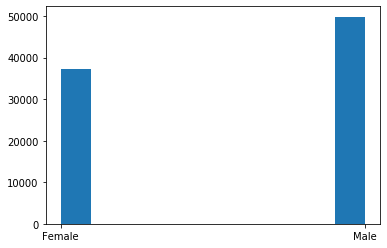

In [24]:
#rozklad zmiennych
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(X['Gender'],bins=10)

In [25]:
#modyfikacje zmiennej
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Gender'] = X['Gender'].replace({"Male":1, "Female":0})

In [26]:
#zmienna City - kategoryczna
X['City'].value_counts()

Delhi             12527
Bengaluru         10824
Mumbai            10795
Hyderabad          7272
Chennai            6916
                  ...  
Baksa                 1
Sawai Madhopur        1
VIRPUR                1
Raisen                1
Giridih               1
Name: City, Length: 697, dtype: int64

In [27]:
#liczba brakujacych danych
calc_missing_values(X['City'])

missing percentage: 1.1526085957251206


In [28]:
X['City'].describe()

count     86017
unique      697
top       Delhi
freq      12527
Name: City, dtype: object

In [29]:
#brakujace wartosci mozna uzupelnic most frequent
#rozklad zmiennych
#plt.hist(X[X['City'] == 'Baksa'],bins=10)

In [30]:
#PROCESSING NAN
#wypełniamy najczęstszym miastem
X['City'] = X['City'].fillna(X['City'].mode()[0])


In [31]:
#kolumna Monthly income - zmienna numeryczna
X['Monthly_Income'].value_counts()

25000    5823
20000    4523
15000    4246
30000    3216
50000    2392
         ... 
21612       1
58490       1
15521       1
33974       1
36978       1
Name: Monthly_Income, Length: 5825, dtype: int64

In [32]:
calc_missing_values(X['Monthly_Income'])

missing percentage: 0.0


In [33]:
#statystyki dla zmiennej 
X['Monthly_Income'].describe()

count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

In [34]:
X['Monthly_Income'].skew()

167.56052617705805

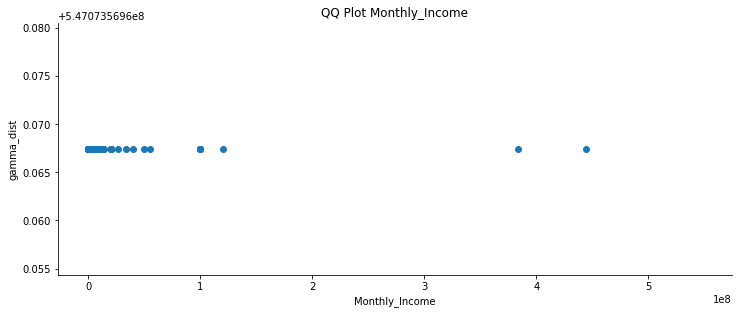

In [35]:
plot_qq(X,'Monthly_Income')

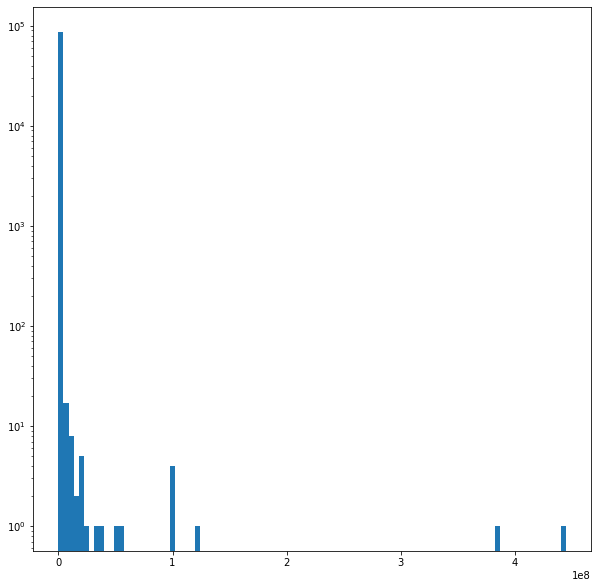

In [36]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Monthly_Income'],bins=100)
plt.yscale('log')
#plt.xscale('log')

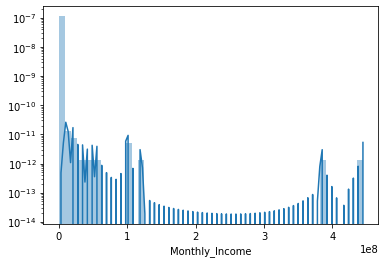

In [37]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Monthly_Income'])
plt.yscale('log')
plt.show()

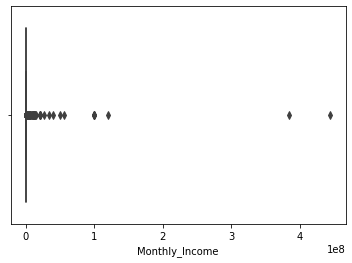

In [38]:
#boxplot outliers
import seaborn as sns
sns.boxplot(x=X['Monthly_Income'])

In [39]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez sqrt()
X['Monthly_Income'] = np.log(X['Monthly_Income']+0.001)

In [40]:
#rozklad zmiennych po konwersji log()
#aby zrobic konwersje trzeba wartosc 0.0 zamienic na bardzo male 0.000001
#rozklad zmiennych
#x_tmp = x
#x_tmp.loc[x_tmp['Monthly_Income'] == 0] = 0.000001
#plt.figure(figsize=(10,10))
#plt.hist(np.log(x_tmp['Monthly_Income']),bins=100)
#plt.yscale('log')
#plt.xscale('log')

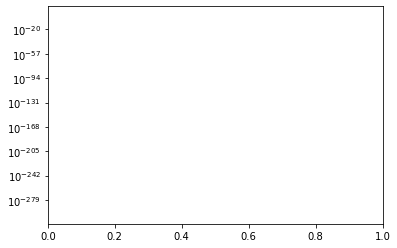

In [41]:
#rozklad zmiennych
import seaborn as sns
#sns.distplot(np.log(x_tmp['Monthly_Income']))
plt.yscale('log')
plt.show()

In [42]:
#zmienna DOB - data
X['DOB'].value_counts()

1980-11-11    306
1970-01-02    226
1970-01-01    148
1990-01-01    131
1980-01-01    111
             ... 
1994-12-09      1
2050-05-20      1
2068-08-25      1
2060-11-30      1
2062-06-24      1
Name: DOB, Length: 11345, dtype: int64

In [43]:
#brakujace wartosci
calc_missing_values(X['DOB'])

missing percentage: 0.0


In [44]:
X['DOB']

0       1978-05-23
1       1985-10-07
2       1981-10-10
3       1987-11-30
4       1984-02-17
           ...    
87015   2069-11-27
87016   1990-12-01
87017   1972-01-28
87018   1977-04-27
87019   1988-10-31
Name: DOB, Length: 87020, dtype: datetime64[ns]

In [45]:
X.loc[X['DOB'] > pd.to_datetime('2015-01-01 00:00:00') ]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
34,1,Mumbai,10.933107,2064-05-28,2015-05-01,500000.0,5.0,14500.0,TEJCONTROL SYSTEMS PVT LTD,HDFC Bank,...,500000.0,5.0,NaN,NaN,NaN,N,Web-browser,E,S133,3
58,1,Mumbai,10.714418,2050-05-20,2015-05-01,0.0,0.0,0.0,XHZ,ICICI Bank,...,940000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S133,2
89,1,Vijayawada,13.304685,2068-04-01,2015-05-01,1000000.0,5.0,15000.0,GOPALA KRISHNA,State Bank of India,...,1000000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S133,3
92,0,Dibrugarh,11.928341,2059-10-21,2015-05-01,2000000.0,5.0,37500.0,B.C.DAS,Allahabad Bank,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,3
125,1,Hyderabad,11.002100,2066-03-04,2015-05-01,300000.0,3.0,17000.0,AIRINDIA,Vijaya Bank,...,300000.0,3.0,14.85,6000.0,10377.58,Y,Web-browser,B,S122,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86998,1,Ahmedabad,10.714418,2056-08-31,2015-07-31,0.0,0.0,0.0,BHARAT SANCHAR NIGAM LTD (BSNL),Corporation bank,...,810000.0,4.0,14.85,16200.0,22481.36,Y,Mobile,G,S122,5
87000,0,Palwal,10.849803,2062-11-01,2015-07-31,300000.0,5.0,23648.0,DHBVN,HDFC Bank,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1
87003,1,Rajkot,10.596635,2060-01-01,2015-07-31,700000.0,0.0,8450.0,KJO,Bank of India,...,570000.0,4.0,NaN,NaN,NaN,N,Web-browser,G,S122,3
87005,1,Nellore,11.661345,2069-02-21,2015-07-31,1000000.0,5.0,0.0,APTRANSCO,Axis Bank,...,1000000.0,5.0,15.75,15000.0,36278.14,N,Web-browser,G,S122,3


In [46]:
#tworzymy nowa kolumne wiek 'AGE'
def create_age_from_dob(data):
    #z DOB robimy sobie Wiek aplikujacego o kredyt przyjmiemy rok 2015 jako rok bazowy
    data['AGE'] = data['DOB'].apply(lambda xval: int((pd.to_datetime('2015-12-30 00:00:00') - xval)/np.timedelta64(1, 'Y')))
    #dane z ujemnym wiekiem uzypelniamy wartoscia srednia z danych ktore sa prawidłow wypelnione czyli DOB < 2015
    data.loc[ X['AGE'] <= 0, 'AGE' ] = data.loc[X['AGE'] > 0 ]['AGE'].mean()
    

In [47]:
create_age_from_dob(X)

In [48]:
X['AGE'].describe()

count    87020.000000
mean        29.789688
std          5.154943
min         18.000000
25%         26.000000
50%         29.000000
75%         33.000000
max         45.000000
Name: AGE, dtype: float64

In [49]:
X['AGE'].skew()

0.7274690305792898

(array([ 123.,  211.,    0.,  482.,    0.,  971.,    0., 1946.,    0.,
        3410.,    0., 4541., 6216.,    0., 6646.,    0., 7118.,    0.,
        6766.,    0., 6443., 4433., 5947.,    0., 5103., 4563.,    0.,
        3933.,    0., 3126.,    0., 3353.,    0., 2130.,    0., 1809.,
           0., 1455., 1241.,    0., 1151.,    0.,  910.,    0.,  773.,
           0.,  705.,    0.,  571.,  944.]),
 array([18.  , 18.54, 19.08, 19.62, 20.16, 20.7 , 21.24, 21.78, 22.32,
        22.86, 23.4 , 23.94, 24.48, 25.02, 25.56, 26.1 , 26.64, 27.18,
        27.72, 28.26, 28.8 , 29.34, 29.88, 30.42, 30.96, 31.5 , 32.04,
        32.58, 33.12, 33.66, 34.2 , 34.74, 35.28, 35.82, 36.36, 36.9 ,
        37.44, 37.98, 38.52, 39.06, 39.6 , 40.14, 40.68, 41.22, 41.76,
        42.3 , 42.84, 43.38, 43.92, 44.46, 45.  ]),
 <a list of 50 Patch objects>)

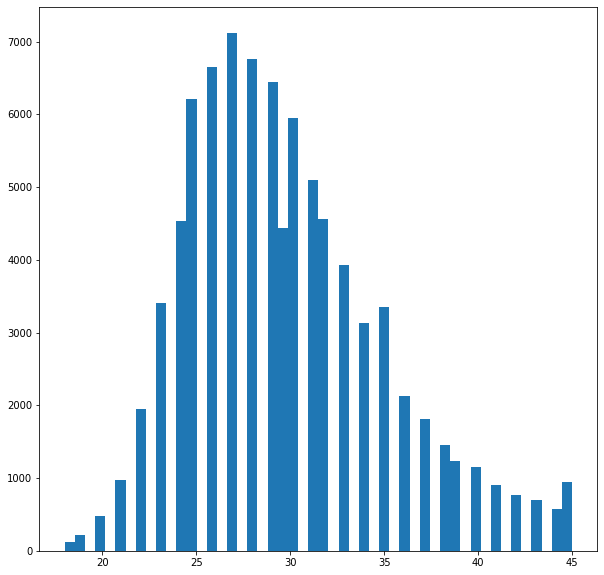

In [50]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['AGE'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [51]:
#zmienna Lead Creation Date
X['Lead_Creation_Date'].value_counts()

2015-07-03    2315
2015-07-23    1994
2015-07-30    1297
2015-07-27    1292
2015-07-31    1268
              ... 
2015-05-24     502
2015-05-31     498
2015-07-12     475
2015-05-10     459
2015-06-14     373
Name: Lead_Creation_Date, Length: 92, dtype: int64

In [52]:
#brakujace wartosci
calc_missing_values(X['Lead_Creation_Date'])

missing percentage: 0.0


In [53]:
#daty trzeba przerobic
#rozklad zmiennych
plt.figure(figsize=(10,10))
#plt.plot(X['Lead_Creation_Date'].year)
#plt.yscale('log')
#plt.xscale('log')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [54]:
#columna lead_creation_date rozbijamy na osobne kolumny
X['LEAD_CREATION_YEAR'] = X['Lead_Creation_Date'].dt.year
X['LEAD_CREATION_MONTH'] = X['Lead_Creation_Date'].dt.month
X['LEAD_CREATION_DAY'] = X['Lead_Creation_Date'].dt.day

In [55]:
# zmienna Loan_Amount_Applied numeryczna
X['Loan_Amount_Applied'].value_counts()

0.0          28853
100000.0     14311
200000.0     13058
300000.0      9995
500000.0      9762
             ...  
560000.0         1
475000.0         1
460000.0         1
1405000.0        1
204000.0         1
Name: Loan_Amount_Applied, Length: 277, dtype: int64

In [56]:
#brakujace wartości
calc_missing_values(X['Loan_Amount_Applied'])

missing percentage: 0.08159043897954493


In [57]:
#statystyki dla zmiennej 
X['Loan_Amount_Applied'].describe()

count    8.694900e+04
mean     2.302507e+05
std      3.542068e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+05
75%      3.000000e+05
max      1.000000e+07
Name: Loan_Amount_Applied, dtype: float64

In [58]:
X['Loan_Amount_Applied'].skew()

5.641871279754185

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


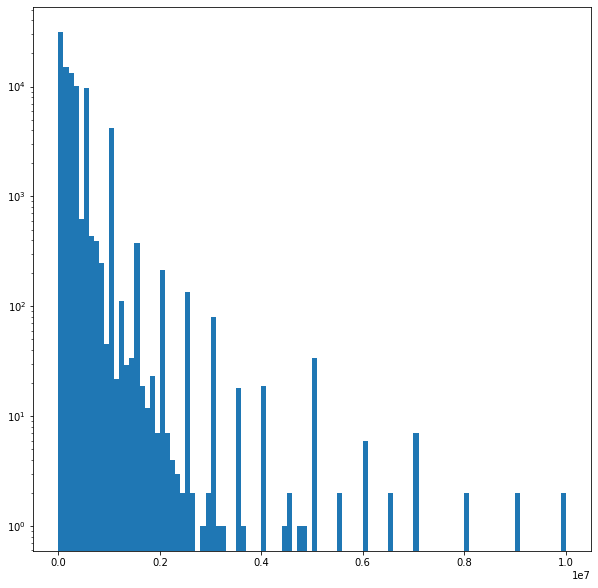

In [59]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Amount_Applied'],bins=100)
plt.yscale('log')
#plt.xscale('log')

In [60]:
#PROCESSING NAN
#mediana
X['Loan_Amount_Applied'] = X['Loan_Amount_Applied'].fillna((X['Loan_Amount_Applied'].median()))

In [61]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez sqrt()
X['Loan_Amount_Applied'] = np.log(X['Loan_Amount_Applied']+0.001)

In [62]:
X['Loan_Amount_Applied'].skew()

-0.694575332740539

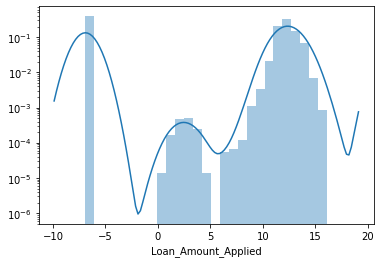

In [63]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Loan_Amount_Applied'])
plt.yscale('log')
plt.show()

In [64]:
# zmienna Loan_Amount_Applied numeryczna
X['Loan_Tenure_Applied'].value_counts()

0.0     33844
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [65]:
#brakujace wartości
calc_missing_values(X['Loan_Tenure_Applied'])

missing percentage: 0.08159043897954493


In [66]:
#statystyki dla zmiennej 
X['Loan_Tenure_Applied'].describe()

count    86949.000000
mean         2.131399
std          2.014193
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: Loan_Tenure_Applied, dtype: float64

In [67]:
X['Loan_Tenure_Applied'].skew()

0.26462404804244716

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.3844e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.8120e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.4630e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3080e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.6200e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9083e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

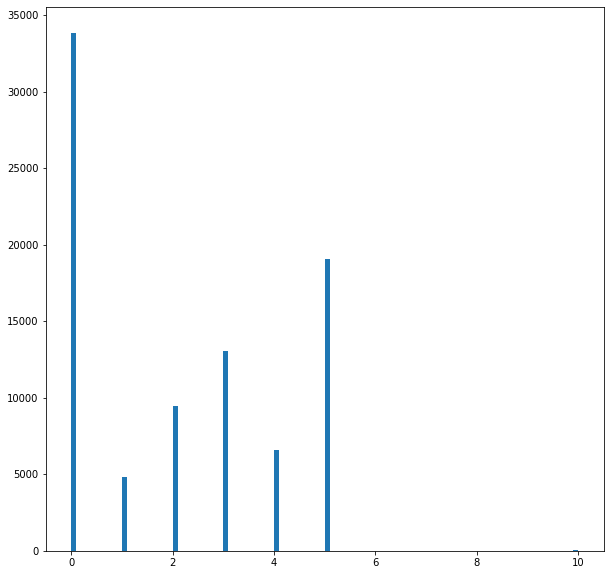

In [68]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Tenure_Applied'],bins=100)
#plt.yscale('log')
#plt.xscale('log')

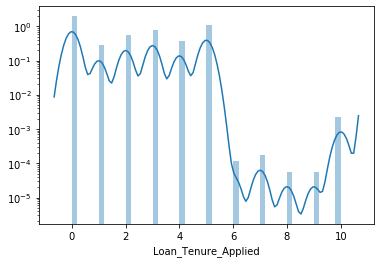

In [69]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Loan_Tenure_Applied'])
plt.yscale('log')
plt.show()

In [70]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia zaokraglonoa w gore
X['Loan_Tenure_Applied'] = X['Loan_Tenure_Applied'].fillna((np.ceil(X['Loan_Tenure_Applied'].mean())))

In [71]:
#zmienna Existing_EMI
X['Existing_EMI'].value_counts()

0.0        58238
5000.0      2695
10000.0     1737
3000.0      1581
4000.0      1226
           ...  
11036.0        1
1703.0         1
2335.0         1
2936.0         1
1543.0         1
Name: Existing_EMI, Length: 3753, dtype: int64

In [72]:
#brakujace wartości
calc_missing_values(X['Existing_EMI'])

missing percentage: 0.08159043897954493


In [73]:
#statystyki dla zmiennej 
X['Existing_EMI'].describe()

count    8.694900e+04
mean     3.696228e+03
std      3.981021e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [74]:
X['Existing_EMI'].skew()

211.7693511145207

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


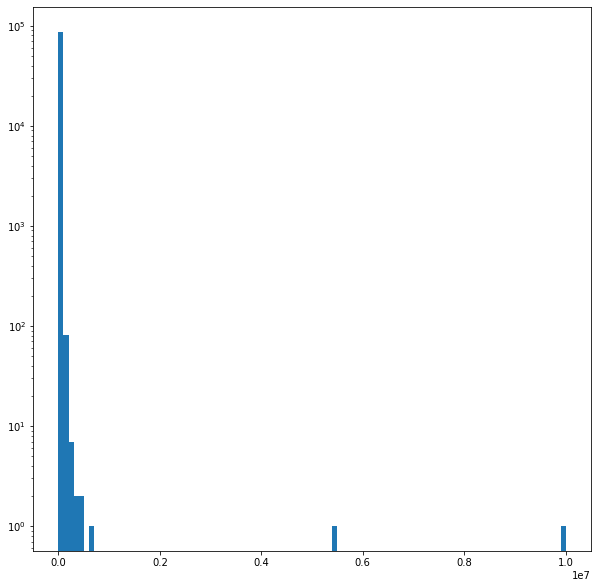

In [75]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Existing_EMI'],bins=100)
plt.yscale('log')
#plt.xscale('log')

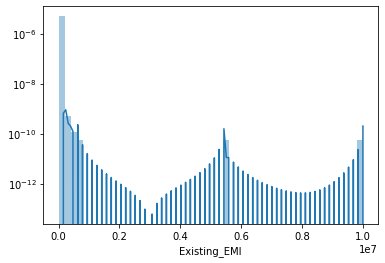

In [76]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Existing_EMI'])
plt.yscale('log')
plt.show()

In [77]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia zaokraglonoa w gore
X['Existing_EMI'] = X['Existing_EMI'].fillna((X['Existing_EMI'].median()))

In [78]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez sqrt()
X['Existing_EMI'] = np.log(X['Existing_EMI']+0.001)

In [79]:
#zmienna Employer_Name
X['Employer_Name'].value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
                                                ... 
MADE EASY EDUCATION PVT LTD                        1
DR. AMBEDKAR LAW COLLEGE                           1
FGJHGJHG                                           1
FRENZINA FERNANDES                                 1
PANORA INFRASTRUCTURE PROJECT MGMT                 1
Name: Employer_Name, Length: 43567, dtype: int64

In [80]:
#brakujace wartości
calc_missing_values(X['Employer_Name'])

missing percentage: 0.08159043897954493


In [81]:
#statystyki dla zmiennej 
X['Employer_Name'].describe()

count     86949
unique    43567
top           0
freq       4914
Name: Employer_Name, dtype: object

In [82]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
#plt.hist(X['Employer_Name'],bins=43568)
#plt.yscale('log')
#plt.xscale('log')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [83]:
#Employer_Name - sprawdzmy czy dla ktorych z pracodawcow chetniej daja pozyczki.
data[data['Disbursed'] == 0 ].Employer_Name.describe()

count     85678
unique    43179
top           0
freq       4909
Name: Employer_Name, dtype: object

In [84]:
#zmienna 'Employer_Name' zamieniamy na 1 gdy obecny 0 gdy nan, 1 ma zatrudnienie 0 - brak zatrudnienia
def prepare_employer_name(data):
    data['Employer_Name'] = np.where(data['Employer_Name'].isnull(), 0, 1)

In [85]:
#prepare_employer_name(X)
X['Employer_Name'] = X['Employer_Name'].fillna(X['Employer_Name'].mode()[0])
X.dtypes

Gender                            int64
City                             object
Monthly_Income                  float64
DOB                      datetime64[ns]
Lead_Creation_Date       datetime64[ns]
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Employer_Name                    object
Salary_Account                   object
Mobile_Verified                  object
Var5                              int64
Var1                             object
Loan_Amount_Submitted           float64
Loan_Tenure_Submitted           float64
Interest_Rate                   float64
Processing_Fee                  float64
EMI_Loan_Submitted              float64
Filled_Form                      object
Device_Type                      object
Var2                             object
Source                           object
Var4                              int64
AGE                             float64
LEAD_CREATION_YEAR                int64


In [86]:
#zmienna Employer_Name
X['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank                                 612
State Bank of Hyderabad        

In [87]:
#brakujace wartości
calc_missing_values(X['Salary_Account'])

missing percentage: 13.518731326131924


In [88]:
#statystyki dla zmiennej 
X['Salary_Account'].describe()

count         75256
unique           57
top       HDFC Bank
freq          17695
Name: Salary_Account, dtype: object

In [89]:
#PROCESSING NAN
X['Salary_Account'] = X['Salary_Account'].fillna(X['Salary_Account'].mode()[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 <a list of 57 Text xticklabel objects>)

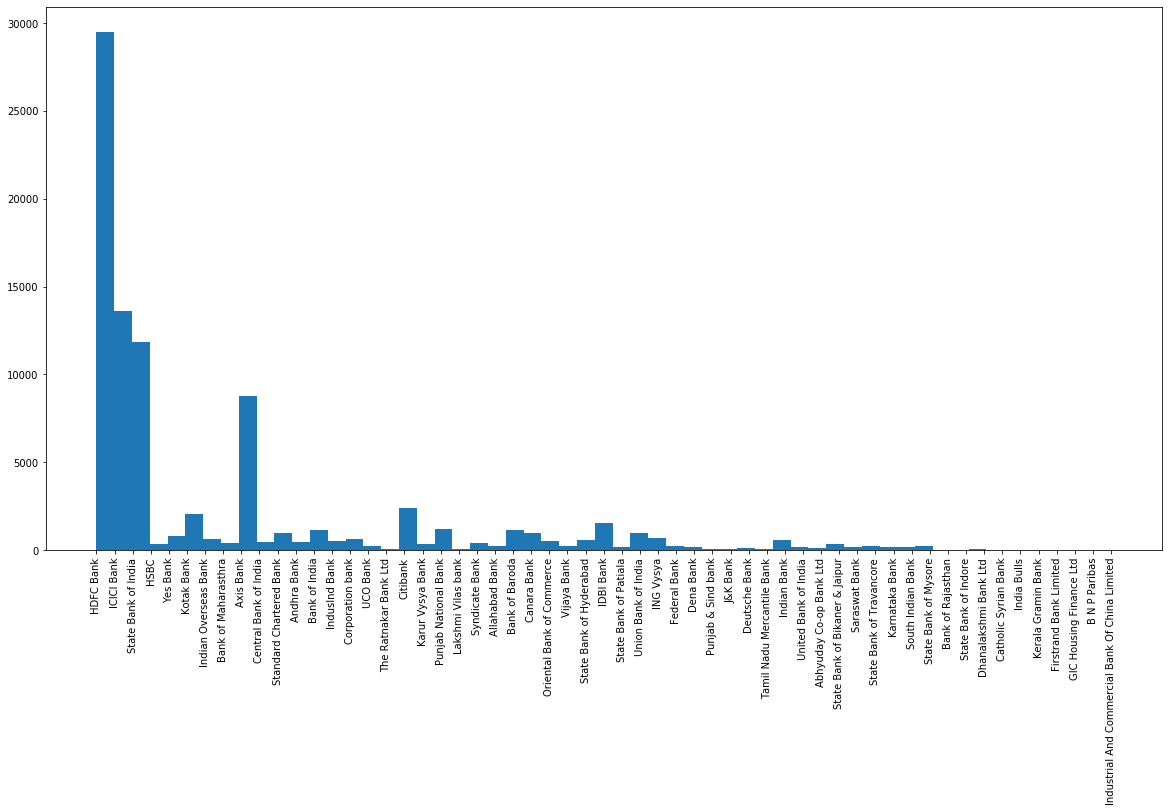

In [90]:
#rozklad zmiennych
plt.figure(figsize=(20,10))
plt.hist(X['Salary_Account'],bins=57)
plt.xticks(rotation='vertical')
#plt.yscale('log')
#plt.xscale('log')

In [91]:
#zmienna Employer_Name
X['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

In [92]:
#brakujace wartości
calc_missing_values(X['Mobile_Verified'])

missing percentage: 0.0


In [93]:
#statystyki dla zmiennej 
X['Mobile_Verified'].describe()

count     87020
unique        2
top           Y
freq      56481
Name: Mobile_Verified, dtype: object

(array([30539.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 56481.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

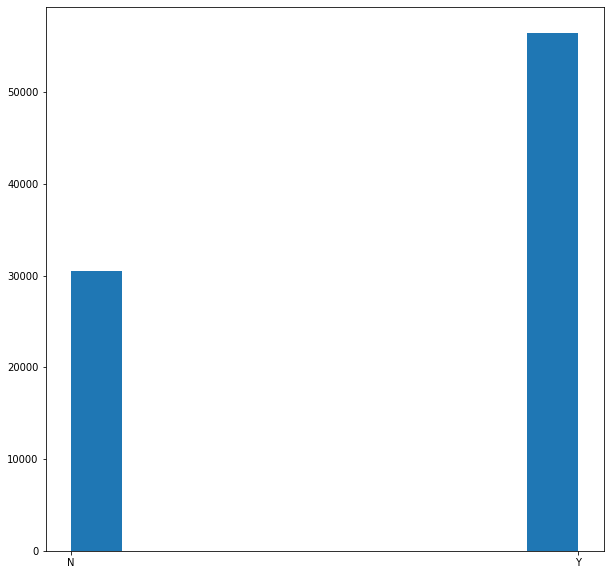

In [94]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Mobile_Verified'],bins=10)
#plt.yscale('log')
#plt.xscale('log')

In [95]:
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Mobile_Verified'] = X['Mobile_Verified'].replace({"Y":1, "N":0})

In [96]:
#zmienna Var5 ciagla numerczna
X['Var5'].value_counts()

0     29087
1     12236
3      6759
11     5204
2      4485
14     3662
15     3509
12     2989
13     2622
8      2515
10     2427
9      2281
16     2097
4      1815
17     1691
7      1489
6       983
5       975
18      194
Name: Var5, dtype: int64

In [97]:
#brakujace wartości
calc_missing_values(X['Var5'])

missing percentage: 0.0


In [98]:
#statystyki dla zmiennej 
X['Var5'].describe()

count    87020.000000
mean         4.961503
std          5.670385
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max         18.000000
Name: Var5, dtype: float64

In [99]:
X['Var5'].skew()

0.7606063211426869

(array([29087., 12236.,  4485.,  6759.,  1815.,   975.,   983.,  1489.,
         2515.,     0.,  2281.,  2427.,  5204.,  2989.,  2622.,  3662.,
         3509.,  2097.,  1691.,   194.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <a list of 20 Patch objects>)

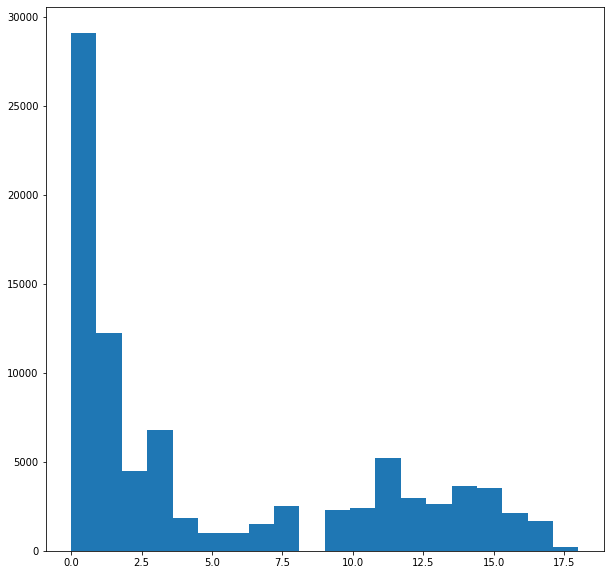

In [100]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var5'],bins=20)
#plt.yscale('log')
#plt.xscale('log')

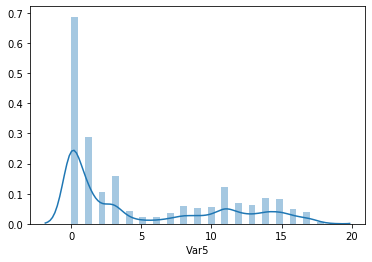

In [101]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Var5'])
#plt.yscale('log')
plt.show()

In [102]:
#zmienna Var1 categorical multiple values
X['Var1'].value_counts()

HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [103]:
#brakujace wartości
calc_missing_values(X['Var1'])

missing percentage: 0.0


In [104]:
#statystyki dla zmiennej 
X['Var1'].describe()

count     87020
unique       19
top        HBXX
freq      59294
Name: Var1, dtype: object

(array([61417.,  2279., 10974.,  3879.,  4479.,   745.,   570.,   187.,
          939.,  1551.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

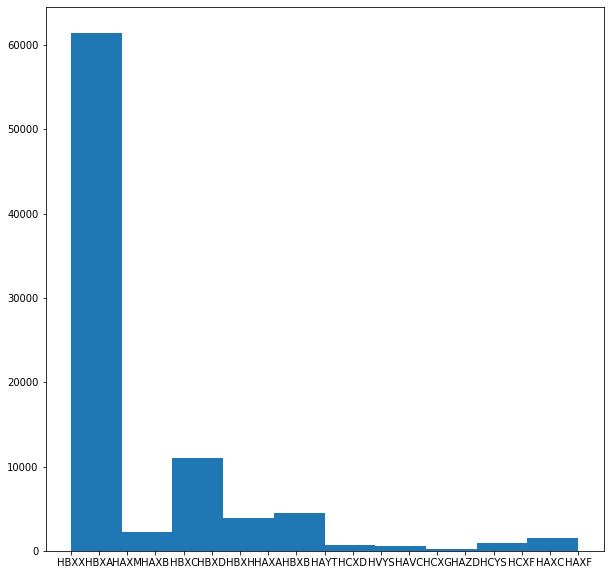

In [105]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var1'],bins=10)
#plt.yscale('log')
#plt.xscale('log')

In [106]:
#zmienna Loan_Amount_Submitted
X['Loan_Amount_Submitted'].value_counts()

100000.0     6884
200000.0     6583
300000.0     5385
500000.0     4849
1000000.0    1644
             ... 
2470000.0       1
1660000.0       1
1890000.0       1
1990000.0       1
1900000.0       1
Name: Loan_Amount_Submitted, Length: 203, dtype: int64

In [107]:
#brakujace wartości
calc_missing_values(X['Loan_Amount_Submitted'])

missing percentage: 39.775913583084346


In [108]:
#statystyki dla zmiennej 
X['Loan_Amount_Submitted'].describe()

count    5.240700e+04
mean     3.950106e+05
std      3.082481e+05
min      5.000000e+04
25%      2.000000e+05
50%      3.000000e+05
75%      5.000000e+05
max      3.000000e+06
Name: Loan_Amount_Submitted, dtype: float64

In [109]:
X['Loan_Amount_Submitted'].skew()

2.104983545111099

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.013e+03, 1.728e+03, 8.448e+03, 2.382e+03, 8.926e+03, 4.353e+03,
        2.718e+03, 6.246e+03, 1.206e+03, 9.280e+02, 8.530e+02, 9.060e+02,
        6.700e+02, 4.850e+02, 4.150e+02, 2.510e+02, 1.815e+03, 1.450e+02,
        1.160e+02, 5.630e+02, 9.700e+01, 5.100e+01, 8.600e+01, 5.100e+01,
        6.850e+02, 1.000e+01, 1.900e+01, 1.300e+01, 9.000e+00, 5.500e+01,
        4.000e+00, 6.000e+00, 6.000e+00, 7.200e+01, 3.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 4.900e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 7.000e+00]),
 array([  50000.,  109000.,  168000.,  227000.,  286000.,  345000.,
         404000.,  463000.,  522000.,  581000.,  640000.,  699000.,
         758000.,  817000.,  876000.,  935000.,  994000., 1053000.,
        1112000., 1171000., 1230000., 1289000., 1348000., 1407000.,
        1466000., 1525000., 1584000., 1643000., 1702000., 1761000.,
        1820000., 1879000., 1938000.

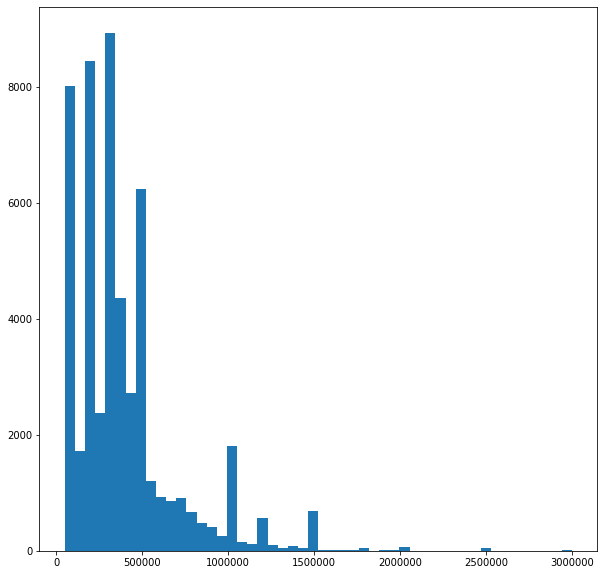

In [110]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Amount_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

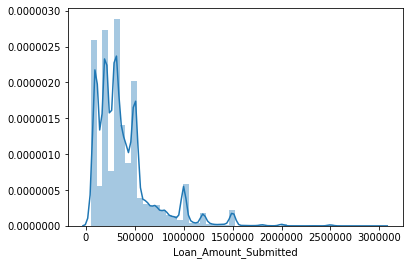

In [111]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(X['Loan_Amount_Submitted'])
#plt.yscale('log')
plt.show()

In [112]:
#PROCESSING NAN
X['Loan_Amount_Submitted'] = X['Loan_Amount_Submitted'].fillna(X['Loan_Amount_Submitted'].mean())

In [113]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez log
X['Loan_Amount_Submitted'] = np.log(X['Loan_Amount_Submitted']+0.001)

In [114]:
#zmienna Loan_Tenure_Submitted
X['Loan_Tenure_Submitted'].value_counts()

5.0    20765
4.0    15135
3.0     8858
2.0     5332
1.0     2314
6.0        3
Name: Loan_Tenure_Submitted, dtype: int64

In [115]:
#brakujace wartości
calc_missing_values(X['Loan_Tenure_Submitted'])

missing percentage: 39.775913583084346


In [116]:
#statystyki dla zmiennej 
X['Loan_Tenure_Submitted'].describe()

count    52407.000000
mean         3.891369
std          1.165359
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Loan_Tenure_Submitted, dtype: float64

In [117]:
X['Loan_Tenure_Submitted'].mode()

0    5.0
dtype: float64

In [118]:
X['Loan_Tenure_Submitted'].skew()

-0.8433232334453925

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.3140e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.3320e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.8580e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.5135e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0765e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ]),
 <a list of 50 Patch objects>

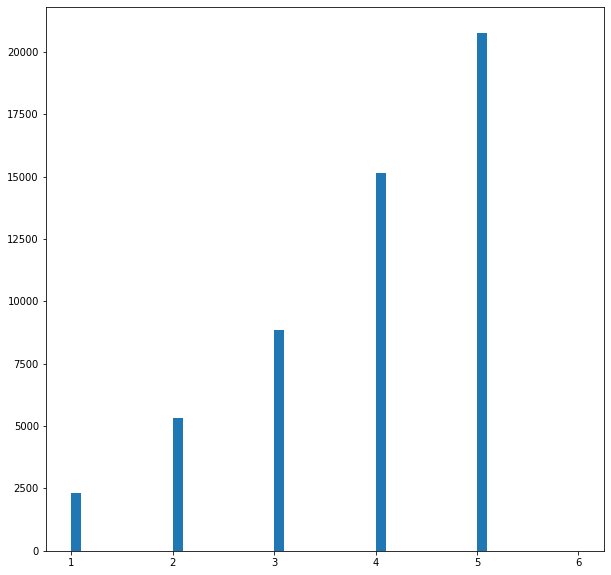

In [119]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Loan_Tenure_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [120]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia zaokraglonoa w gore
X['Loan_Tenure_Submitted'] = X['Loan_Tenure_Submitted'].fillna((np.ceil(X['Loan_Tenure_Submitted'].mean())))

In [121]:
#zmienna Intrest_Rate
X['Interest_Rate'].value_counts()

20.00    4707
14.85    2016
13.99    1699
31.50    1696
15.25    1553
         ... 
14.55       2
20.50       2
15.60       1
14.29       1
15.15       1
Name: Interest_Rate, Length: 73, dtype: int64

In [122]:
#brakujace wartości
calc_missing_values(X['Interest_Rate'])

missing percentage: 68.13835899793152


In [123]:
#statystyki dla zmiennej 
X['Interest_Rate'].describe()

count    27726.000000
mean        19.197474
std          5.834213
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

In [124]:
X['Interest_Rate'].skew()

1.4303011883579213

(array([9.000e+01, 1.910e+02, 1.022e+03, 2.475e+03, 5.650e+02, 2.381e+03,
        1.808e+03, 1.868e+03, 7.940e+02, 1.633e+03, 4.160e+02, 4.300e+02,
        3.092e+03, 3.150e+02, 6.430e+02, 1.860e+02, 4.707e+03, 2.000e+00,
        0.000e+00, 2.100e+01, 6.600e+01, 0.000e+00, 1.500e+01, 8.400e+01,
        6.490e+02, 1.100e+01, 0.000e+00, 6.500e+01, 0.000e+00, 1.600e+01,
        1.970e+02, 2.600e+01, 6.000e+00, 9.500e+02, 4.600e+01, 2.600e+01,
        0.000e+00, 1.300e+01, 5.600e+01, 1.696e+03, 0.000e+00, 2.120e+02,
        1.580e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.930e+02,
        0.000e+00, 3.020e+02]),
 array([11.99  , 12.4902, 12.9904, 13.4906, 13.9908, 14.491 , 14.9912,
        15.4914, 15.9916, 16.4918, 16.992 , 17.4922, 17.9924, 18.4926,
        18.9928, 19.493 , 19.9932, 20.4934, 20.9936, 21.4938, 21.994 ,
        22.4942, 22.9944, 23.4946, 23.9948, 24.495 , 24.9952, 25.4954,
        25.9956, 26.4958, 26.996 , 27.4962, 27.9964, 28.4966, 28.9968,
        29.497 , 29.9

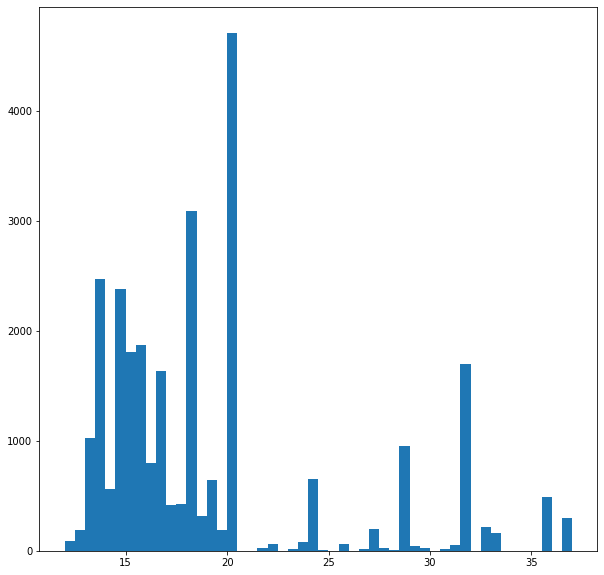

In [125]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Interest_Rate'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [126]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia
X['Interest_Rate'] = X['Interest_Rate'].fillna((X['Interest_Rate'].mean()))

In [127]:
#zmienna Processing_Fee
X['Processing_Fee'].value_counts()

2000.0     3074
1000.0     2067
4000.0     2006
3000.0     1286
6000.0     1183
           ... 
13464.0       1
3969.0        1
7326.0        1
5920.0        1
9120.0        1
Name: Processing_Fee, Length: 571, dtype: int64

In [128]:
#brakujace wartości
calc_missing_values(X['Processing_Fee'])

missing percentage: 68.49000229832222


In [129]:
#statystyki dla zmiennej 
X['Processing_Fee'].describe()

count    27420.000000
mean      5131.150839
std       4725.837644
min        200.000000
25%       2000.000000
50%       4000.000000
75%       6250.000000
max      50000.000000
Name: Processing_Fee, dtype: float64

In [130]:
X['Processing_Fee'].skew()

2.6801088555079806

(array([1.000e+00, 0.000e+00, 1.900e+01, 6.000e+00, 1.000e+00, 9.000e+00,
        1.500e+01, 4.000e+00, 1.960e+02, 9.000e+00, 1.300e+01, 5.500e+01,
        2.800e+01, 2.200e+01, 2.260e+03, 8.400e+01, 3.420e+02, 1.860e+02,
        9.210e+02, 2.970e+02, 3.305e+03, 4.360e+02, 9.010e+02, 5.650e+02,
        1.883e+03, 1.076e+03, 1.047e+03, 2.931e+03, 1.044e+03, 1.127e+03,
        1.639e+03, 9.740e+02, 8.040e+02, 8.220e+02, 4.890e+02, 1.520e+03,
        3.690e+02, 5.180e+02, 3.130e+02, 2.980e+02, 1.570e+02, 3.220e+02,
        8.000e+01, 9.300e+01, 2.200e+01, 1.560e+02, 1.000e+01, 4.700e+01,
        0.000e+00, 4.000e+00]),
 array([ 5.29831737,  5.40874658,  5.5191758 ,  5.62960502,  5.74003424,
         5.85046346,  5.96089268,  6.0713219 ,  6.18175111,  6.29218033,
         6.40260955,  6.51303877,  6.62346799,  6.73389721,  6.84432642,
         6.95475564,  7.06518486,  7.17561408,  7.2860433 ,  7.39647252,
         7.50690173,  7.61733095,  7.72776017,  7.83818939,  7.94861861,
         8.

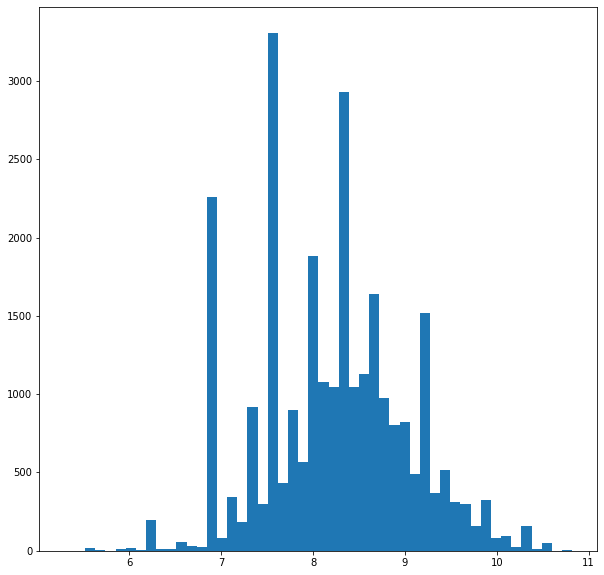

In [131]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(np.log(X['Processing_Fee']),bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [132]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia
X['Processing_Fee'] = X['Processing_Fee'].fillna((X['Processing_Fee'].mean()))

In [133]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez log
X['Processing_Fee'] = np.log(X['Processing_Fee']+0.001)

In [134]:
#zmienna EMI_Loan_Submitted
X['EMI_Loan_Submitted'].value_counts()

3716.36     288
7948.17     252
5089.58     240
5298.78     229
8742.98     218
           ... 
12558.05      1
4530.63       1
46168.22      1
1674.50       1
11463.79      1
Name: EMI_Loan_Submitted, Length: 4530, dtype: int64

In [135]:
#brakujace wartości
calc_missing_values(X['EMI_Loan_Submitted'])

missing percentage: 68.13835899793152


In [136]:
#wyswietl wiersze dla ktorych EMI_Loan_Submitted is nan
X.loc[X['EMI_Loan_Submitted'].isnull()]

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,AGE,LEAD_CREATION_YEAR,LEAD_CREATION_MONTH,LEAD_CREATION_DAY
0,0,Delhi,9.903488,1978-05-23,2015-05-15,12.611538,5.0,-6.907755,CYBOSOL,HDFC Bank,...,NaN,N,Web-browser,G,S122,1,37.000000,2015,5,15
2,1,Panchkula,10.021271,1981-10-10,2015-05-19,13.304685,4.0,-6.907755,ALCHEMIST HOSPITALS LTD,State Bank of India,...,NaN,N,Web-browser,B,S143,1,34.000000,2015,5,19
3,1,Saharsa,10.463103,1987-11-30,2015-05-09,13.815511,5.0,-6.907755,BIHAR GOVERNMENT,State Bank of India,...,NaN,N,Web-browser,B,S143,3,28.000000,2015,5,9
4,1,Bengaluru,11.512925,1984-02-17,2015-05-20,13.122363,2.0,10.126631,GLOBAL EDGE SOFTWARE,HDFC Bank,...,NaN,N,Web-browser,B,S134,3,31.000000,2015,5,20
6,0,Sindhudurg,11.156251,1987-10-23,2015-05-01,1.791926,5.0,-6.907755,CARNIVAL CRUISE LINE,Yes Bank,...,NaN,N,Web-browser,B,S133,1,28.000000,2015,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87013,1,Secunderabad,10.085809,1990-01-01,2015-07-31,12.611538,3.0,-6.907755,INDIAN AIR FORCE,State Bank of India,...,NaN,N,Web-browser,G,S122,3,25.000000,2015,7,31
87014,0,Pune,10.799576,1982-05-31,2015-07-31,12.899220,5.0,-6.907755,INFOSYS TECHNOLOGIES,ICICI Bank,...,NaN,N,Web-browser,G,S122,3,33.000000,2015,7,31
87015,0,Ajmer,11.183045,2069-11-27,2015-07-31,13.815511,5.0,9.581904,MAYO COLLEGE,ICICI Bank,...,NaN,N,Web-browser,G,S122,3,29.789688,2015,7,31
87017,1,Bengaluru,11.678440,1972-01-28,2015-07-31,-6.907755,0.0,-6.907755,BANGALORE INSTITUTE OF TECHNOLOGY,Syndicate Bank,...,NaN,N,Mobile,G,S122,3,43.000000,2015,7,31


In [137]:
#statystyki dla zmiennej 
X['EMI_Loan_Submitted'].describe()

count     27726.000000
mean      10999.528377
std        7512.323050
min        1176.410000
25%        6491.600000
50%        9392.970000
75%       12919.040000
max      144748.280000
Name: EMI_Loan_Submitted, dtype: float64

In [138]:
X['EMI_Loan_Submitted'].skew()

2.7549554106213368

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.737e+03, 4.730e+03, 7.425e+03, 5.652e+03, 2.706e+03, 1.454e+03,
        7.840e+02, 5.970e+02, 4.320e+02, 3.330e+02, 1.720e+02, 2.230e+02,
        1.090e+02, 1.530e+02, 8.000e+01, 3.500e+01, 3.800e+01, 2.200e+01,
        7.000e+00, 9.000e+00, 7.000e+00, 5.000e+00, 9.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1176.41  ,   4047.8474,   6919.2848,   9790.7222,  12662.1596,
         15533.597 ,  18405.0344,  21276.4718,  24147.9092,  27019.3466,
         29890.784 ,  32762.2214,  35633.6588,  38505.0962,  41376.5336,
         44247.971 ,  47119.4084,  49990.8458,  52862.2832,  55733.7206,
         58605.158 ,  61476.5954,  64348.0328,  67219.4702,  70090.9076,
         72

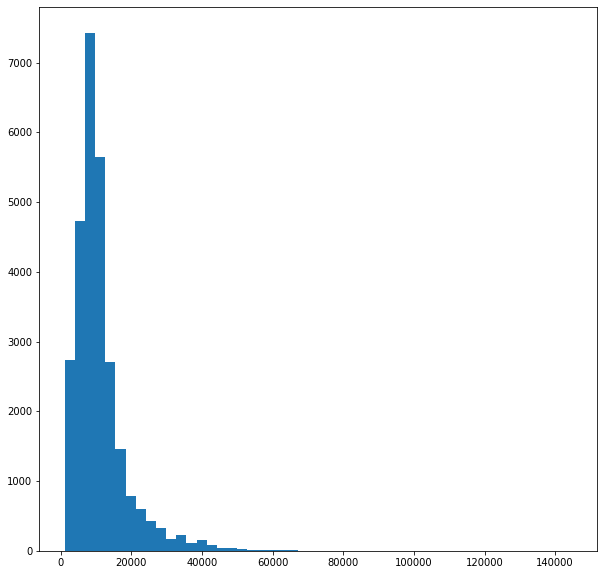

In [139]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['EMI_Loan_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [140]:
#PROCESSING NAN
#brakujace wartosci uzupelniamy wartoscia srednia
X['EMI_Loan_Submitted'] = X['EMI_Loan_Submitted'].fillna((X['EMI_Loan_Submitted'].mean()))

In [141]:
#PROCESSING SKEWNEES
#rozkład poprawiamy przez log
X['EMI_Loan_Submitted'] = np.log(X['EMI_Loan_Submitted']+0.001)

In [142]:
#zmienna Filled_Form
X['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [143]:
#brakujace wartości
calc_missing_values(X['Filled_Form'])

missing percentage: 0.0


In [144]:
#statystyki dla zmiennej 
X['Filled_Form'].describe()

count     87020
unique        2
top           N
freq      67530
Name: Filled_Form, dtype: object

(array([67530.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19490.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

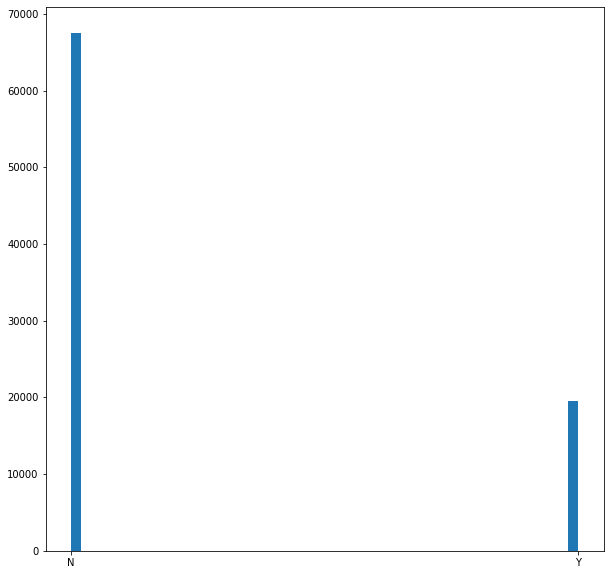

In [145]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Filled_Form'],bins=50)
#plt.yscale('log')
#plt.xscale('log')


In [146]:
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Filled_Form'] = X['Filled_Form'].replace({"Y":1, "N":0})

In [147]:
#zmienna Device_Type
X['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [148]:
#brakujace wartości
calc_missing_values(X['Device_Type'])

missing percentage: 0.0


In [149]:
#statystyki dla zmiennej 
X['Device_Type'].describe()

count           87020
unique              2
top       Web-browser
freq            64316
Name: Device_Type, dtype: object

(array([64316.,     0., 22704.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

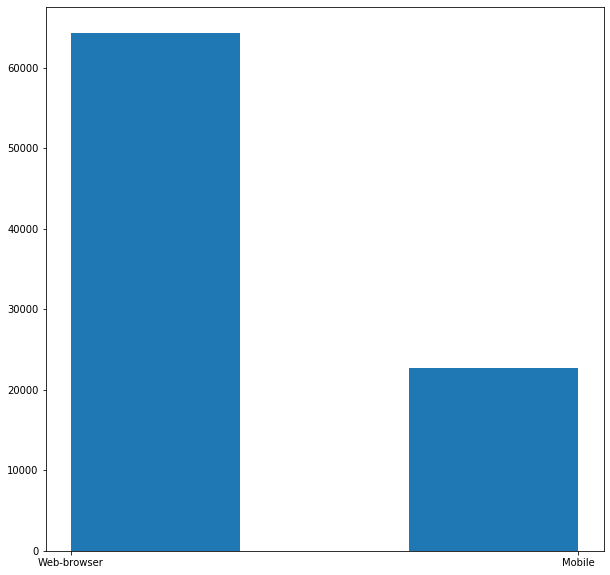

In [150]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Device_Type'],bins=3)
#plt.yscale('log')
#plt.xscale('log')

In [151]:
#Mobile_Verfied encodujemy na 1 - y 0 - n 
X['Device_Type'] = X['Device_Type'].replace({"Web-browser":1, "Mobile":0})

In [152]:
#zmienna Var2 - categorical multiple level
X['Var2'].value_counts()

B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

In [153]:
#brakujace wartości
calc_missing_values(X['Var2'])

missing percentage: 0.0


In [154]:
#statystyki dla zmiennej 
X['Var2'].describe()

count     87020
unique        7
top           B
freq      37280
Name: Var2, dtype: object

(array([3.3032e+04, 3.7280e+04, 1.4210e+04, 0.0000e+00, 1.3150e+03,
        5.4400e+02, 6.3400e+02, 5.0000e+00]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  , 3.75, 4.5 , 5.25, 6.  ]),
 <a list of 8 Patch objects>)

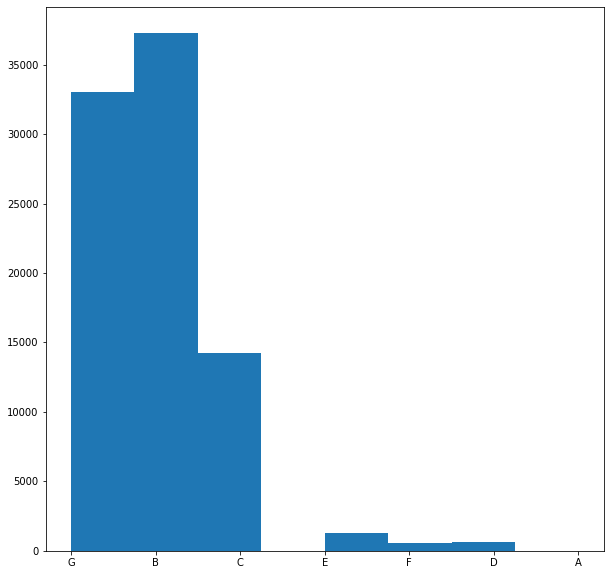

In [155]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var2'],bins=8)
#plt.yscale('log')
#plt.xscale('log')

In [156]:
#zmienna Source categorical multiple level
X['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S136        3
S129        3
S138        3
S139        3
S135        2
S125        1
S154        1
S140        1
S130        1
Name: Source, dtype: int64

In [157]:
#brakujace wartości
calc_missing_values(X['Source'])

missing percentage: 0.0


In [158]:
#statystyki dla zmiennej 
X['Source'].describe()

count     87020
unique       30
top        S122
freq      38567
Name: Source, dtype: object

(array([3.8567e+04, 4.3320e+03, 1.3010e+03, 2.9885e+04, 5.5990e+03,
        7.2000e+02, 1.7240e+03, 1.9310e+03, 2.9900e+02, 7.3000e+01,
        3.0800e+02, 4.9400e+02, 2.4000e+01, 7.6900e+02, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 6.5000e+02, 3.0000e+00, 3.6000e+01,
        5.7000e+01, 2.0800e+02, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 4.0000e+00, 1.1000e+01, 1.0000e+01, 2.0000e+00,
        1.0000e+00]),
 array([ 0.        ,  0.93548387,  1.87096774,  2.80645161,  3.74193548,
         4.67741935,  5.61290323,  6.5483871 ,  7.48387097,  8.41935484,
         9.35483871, 10.29032258, 11.22580645, 12.16129032, 13.09677419,
        14.03225806, 14.96774194, 15.90322581, 16.83870968, 17.77419355,
        18.70967742, 19.64516129, 20.58064516, 21.51612903, 22.4516129 ,
        23.38709677, 24.32258065, 25.25806452, 26.19354839, 27.12903226,
        28.06451613, 29.        ]),
 <a list of 31 Patch objects>)

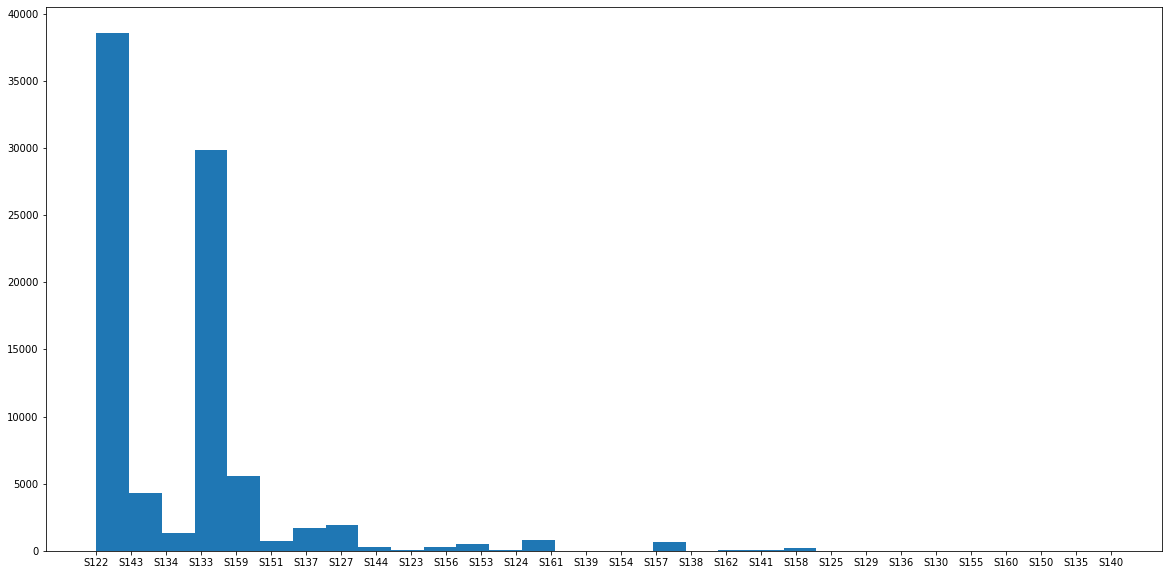

In [159]:
#rozklad zmiennych
plt.figure(figsize=(20,10))
plt.hist(X['Source'],bins=31)
#plt.yscale('log')
#plt.xscale('log')

In [160]:
#zmienna Var4 categorical multiple level
X['Var4'].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

In [161]:
#brakujace wartości
calc_missing_values(X['Var4'])

missing percentage: 0.0


In [162]:
#statystyki dla zmiennej 
X['Var4'].describe()

count    87020.000000
mean         2.949805
std          1.697720
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          7.000000
Name: Var4, dtype: float64

(array([ 2546.,     0.,     0.,     0., 23906.,     0.,     0.,     0.,
         5931.,     0.,     0.,     0.,     0., 25260.,     0.,     0.,
            0.,  6577.,     0.,     0.,     0.,     0., 20266.,     0.,
            0.,     0.,   232.,     0.,     0.,     0.,  2302.]),
 array([0.        , 0.22580645, 0.4516129 , 0.67741935, 0.90322581,
        1.12903226, 1.35483871, 1.58064516, 1.80645161, 2.03225806,
        2.25806452, 2.48387097, 2.70967742, 2.93548387, 3.16129032,
        3.38709677, 3.61290323, 3.83870968, 4.06451613, 4.29032258,
        4.51612903, 4.74193548, 4.96774194, 5.19354839, 5.41935484,
        5.64516129, 5.87096774, 6.09677419, 6.32258065, 6.5483871 ,
        6.77419355, 7.        ]),
 <a list of 31 Patch objects>)

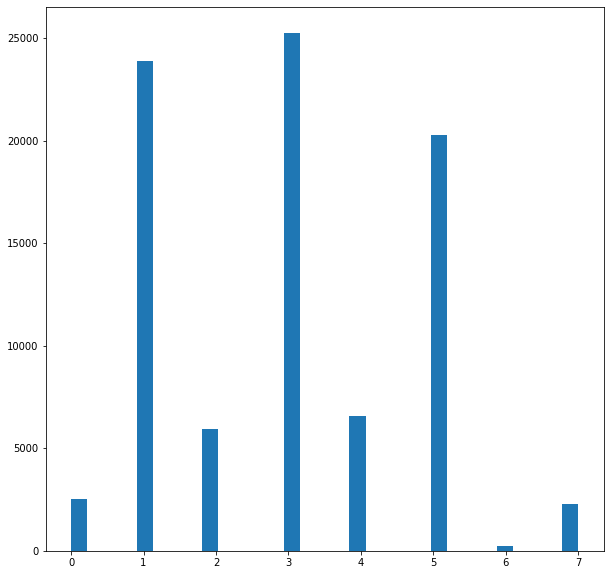

In [163]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(X['Var4'],bins=31)
#plt.yscale('log')
#plt.xscale('log')

## zaczynamy modelowanie

In [164]:
#wstepne modeloweanie przy zalozeniu ze zmienne mamy oczyszczone, przygotowane w pierwszej czesci notebooka

In [165]:
outliers_detection(X,'Monthly_Income')

Q1 {} 9.71111572049473
Q3 {} 10.596634758096073


,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,AGE,LEAD_CREATION_YEAR,LEAD_CREATION_MONTH,LEAD_CREATION_DAY
27,0,Delhi,7.972466,1982-07-22,2015-05-01,-6.907755,0.0,-6.907755,INVENTIV INTERNATIONAL PHARMA SERVICES P LTD,Standard Chartered Bank,...,9.305608,0,0,C,S133,1,33.000000,2015,5,1
29,1,Mumbai,12.206073,1985-02-05,2015-05-01,13.815511,0.0,-6.907755,APT BUSINESS SERVICES LLP,State Bank of India,...,9.305608,0,1,B,S159,2,30.000000,2015,5,1
89,1,Vijayawada,13.304685,2068-04-01,2015-05-01,13.815511,5.0,9.615806,GOPALA KRISHNA,State Bank of India,...,9.305608,0,1,B,S133,3,29.789688,2015,5,1
92,0,Dibrugarh,11.928341,2059-10-21,2015-05-01,14.508658,5.0,10.532096,B.C.DAS,Allahabad Bank,...,9.305608,0,1,B,S133,3,29.789688,2015,5,1
107,0,Vadodara,12.078239,1995-12-26,2015-05-01,11.082143,1.0,-6.907755,TYPE SLOWLY FOR AUTO FILL,ICICI Bank,...,9.305608,0,1,B,S122,1,20.000000,2015,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86818,1,Delhi,11.982929,1985-01-25,2015-07-31,13.815511,5.0,10.819778,ESCORT LTD,ICICI Bank,...,9.305608,0,1,G,S122,3,30.000000,2015,7,31
86824,0,Mumbai,12.858398,1983-07-08,2015-07-31,14.731801,0.0,-6.907755,BHAKTIVEDANTA SWAMI MISSION SCHOOL,ICICI Bank,...,9.305608,0,1,G,S122,3,32.000000,2015,7,31
86858,0,Bengaluru,7.377760,1991-08-05,2015-07-31,12.611538,3.0,-6.907755,P P MERCHANTSING SERVICE PVT LTD,Syndicate Bank,...,9.305608,0,1,G,S122,1,24.000000,2015,7,31
86879,1,Delhi,13.399995,1986-10-23,2015-07-31,-6.907755,0.0,-6.907755,CROMPTON GREAVES LIMITED,Axis Bank,...,9.305608,0,0,G,S122,3,29.000000,2015,7,31


,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,AGE,LEAD_CREATION_YEAR,LEAD_CREATION_MONTH,LEAD_CREATION_DAY
27,0,Delhi,7.972466,1982-07-22,2015-05-01,-6.907755,0.0,-6.907755,INVENTIV INTERNATIONAL PHARMA SERVICES P LTD,Standard Chartered Bank,...,9.305608,0,0,C,S133,1,33.000000,2015,5,1
29,1,Mumbai,12.206073,1985-02-05,2015-05-01,13.815511,0.0,-6.907755,APT BUSINESS SERVICES LLP,State Bank of India,...,9.305608,0,1,B,S159,2,30.000000,2015,5,1
89,1,Vijayawada,13.304685,2068-04-01,2015-05-01,13.815511,5.0,9.615806,GOPALA KRISHNA,State Bank of India,...,9.305608,0,1,B,S133,3,29.789688,2015,5,1
92,0,Dibrugarh,11.928341,2059-10-21,2015-05-01,14.508658,5.0,10.532096,B.C.DAS,Allahabad Bank,...,9.305608,0,1,B,S133,3,29.789688,2015,5,1
107,0,Vadodara,12.078239,1995-12-26,2015-05-01,11.082143,1.0,-6.907755,TYPE SLOWLY FOR AUTO FILL,ICICI Bank,...,9.305608,0,1,B,S122,1,20.000000,2015,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86818,1,Delhi,11.982929,1985-01-25,2015-07-31,13.815511,5.0,10.819778,ESCORT LTD,ICICI Bank,...,9.305608,0,1,G,S122,3,30.000000,2015,7,31
86824,0,Mumbai,12.858398,1983-07-08,2015-07-31,14.731801,0.0,-6.907755,BHAKTIVEDANTA SWAMI MISSION SCHOOL,ICICI Bank,...,9.305608,0,1,G,S122,3,32.000000,2015,7,31
86858,0,Bengaluru,7.377760,1991-08-05,2015-07-31,12.611538,3.0,-6.907755,P P MERCHANTSING SERVICE PVT LTD,Syndicate Bank,...,9.305608,0,1,G,S122,1,24.000000,2015,7,31
86879,1,Delhi,13.399995,1986-10-23,2015-07-31,-6.907755,0.0,-6.907755,CROMPTON GREAVES LIMITED,Axis Bank,...,9.305608,0,0,G,S122,3,29.000000,2015,7,31


In [166]:
#zobaczmy co jeszcze mozna by robić  pod kątem PCA
#zależności pair plot
#import seaborn as sns
#plt.figure(figsize=(100,100))
#sns.set(rc={'figure.figsize':(100,100)})
#sns.pairplot(data=X, height=5,aspect=1)
#plt.show()

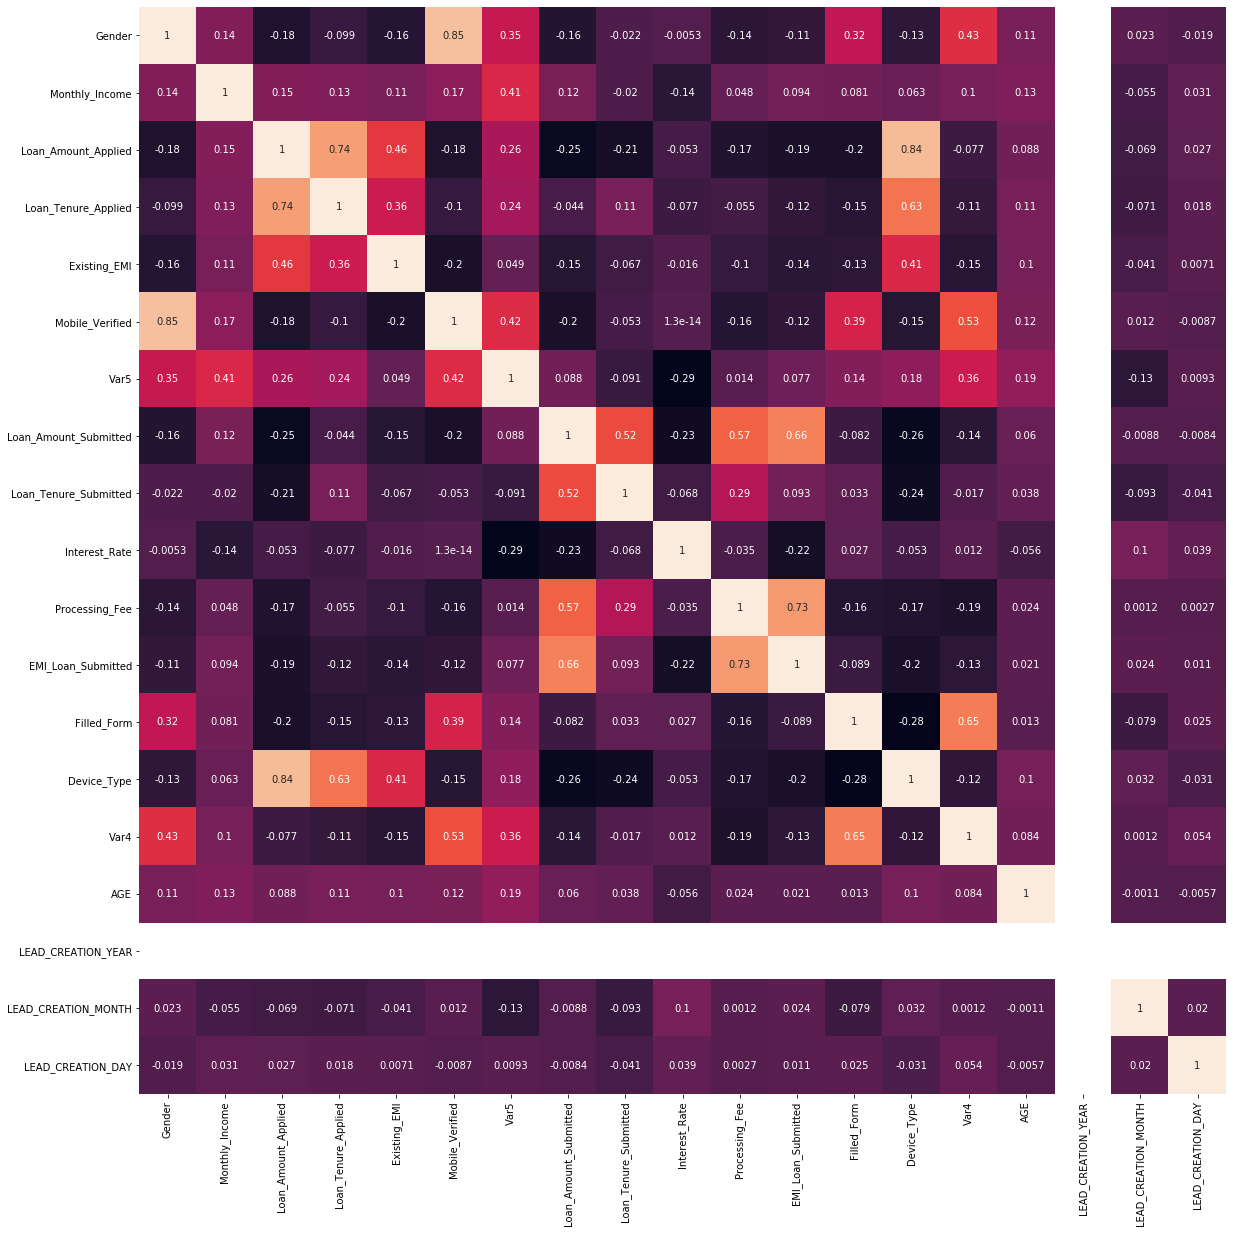

In [167]:
#heatmap
import seaborn as sns
plt.figure(figsize=(20,20))
dcorr = X.corr()
sns.heatmap(dcorr, xticklabels=dcorr.columns,yticklabels=dcorr.columns, square=True, annot=True,cbar=False);



In [168]:
#heatmap
pd.set_option('display.max_rows', 200)
import seaborn as sns
#plt.figure(figsize=(100,100))
X.corr(method ='pearson')
#print(dcorr)
#sns.heatmap(dcorr, xticklabels=dcorr.columns,yticklabels=dcorr.columns, square=True, annot=True,cbar=False);

,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var4,AGE,LEAD_CREATION_YEAR,LEAD_CREATION_MONTH,LEAD_CREATION_DAY
Gender,1.000000,0.135517,-0.176717,-0.099423,-0.158106,8.515146e-01,0.345375,-0.160956,-0.022255,-5.286707e-03,-0.138867,-0.113832,0.322160,-0.129208,0.433722,0.108988,NaN,0.023422,-0.019285
Monthly_Income,0.135517,1.000000,0.145969,0.126398,0.107333,1.681689e-01,0.408601,0.116859,-0.020429,-1.422194e-01,0.047576,0.094434,0.081048,0.063022,0.104662,0.126606,NaN,-0.054880,0.031044
Loan_Amount_Applied,-0.176717,0.145969,1.000000,0.744355,0.464510,-1.823015e-01,0.258455,-0.247330,-0.214459,-5.330528e-02,-0.172457,-0.191982,-0.195671,0.837833,-0.077198,0.087764,NaN,-0.069357,0.026653
Loan_Tenure_Applied,-0.099423,0.126398,0.744355,1.000000,0.357945,-1.040076e-01,0.240437,-0.044046,0.106999,-7.659933e-02,-0.055352,-0.119758,-0.146462,0.626565,-0.108153,0.109865,NaN,-0.070801,0.018295
Existing_EMI,-0.158106,0.107333,0.464510,0.357945,1.000000,-1.990975e-01,0.048550,-0.154237,-0.067430,-1.562680e-02,-0.103182,-0.142247,-0.131300,0.414930,-0.149207,0.100771,NaN,-0.040992,0.007073
Mobile_Verified,0.851515,0.168169,-0.182302,-0.104008,-0.199097,1.000000e+00,0.424420,-0.197490,-0.053102,1.256666e-14,-0.157318,-0.122064,0.394109,-0.153188,0.526703,0.116421,NaN,0.011642,-0.008731
Var5,0.345375,0.408601,0.258455,0.240437,0.048550,4.244198e-01,1.000000,0.088215,-0.090929,-2.860519e-01,0.013558,0.077182,0.137279,0.177597,0.357712,0.186953,NaN,-0.131040,0.009326
Loan_Amount_Submitted,-0.160956,0.116859,-0.247330,-0.044046,-0.154237,-1.974898e-01,0.088215,1.000000,0.517460,-2.337850e-01,0.574249,0.660319,-0.082240,-0.259906,-0.140681,0.060474,NaN,-0.008768,-0.008404
Loan_Tenure_Submitted,-0.022255,-0.020429,-0.214459,0.106999,-0.067430,-5.310170e-02,-0.090929,0.517460,1.000000,-6.788884e-02,0.289805,0.093038,0.033472,-0.238210,-0.017071,0.038113,NaN,-0.092569,-0.041036
Interest_Rate,-0.005287,-0.142219,-0.053305,-0.076599,-0.015627,1.256666e-14,-0.286052,-0.233785,-0.067889,1.000000e+00,-0.034607,-0.219340,0.027084,-0.052949,0.012378,-0.055634,NaN,0.101423,0.039095


In [169]:
break_dupa(1)

NameError: name 'break_dupa' is not defined

In [170]:
#dane mamy pozbabione nan oczysczone itd, one-hot dla zmiennych kategorycznych
#X = pd.get_dummies(X.drop(["name","ticket","home.dest", "survived"], 
#                            axis=1)
#                  )
#"City","Employer_Name","Salary_Account"
X = pd.get_dummies(X.drop(["DOB", "Lead_Creation_Date","Employer_Name"], axis=1)
                  )

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
pca.fit(scale(X))
plt.bar(range(1,1+pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [ ]:
n_components=10
plt.bar(range(1,1+pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [ ]:
X.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y)

In [ ]:
#unbalance ratio
class_ratio =int((y.shape[0]-np.count_nonzero(y))/np.count_nonzero(y))
print(class_ratio)

In [ ]:
#undersampling
X_smaller = X.values
y_smaller = y

X_smaller_0 = X_smaller[y_smaller == 0, :]
X_smaller_1 = X_smaller[y_smaller == 1, :]

print(X_smaller_0.shape, X_smaller_1.shape)

indices_0_undersampled = np.random.choice(X_smaller_0.shape[0], size=X_smaller_1.shape[0], replace=False)

X_undersampled_0 = X_smaller_0[indices_0_undersampled]

X_undersampled = np.vstack([X_undersampled_0, X_smaller_1])

y_undersampled = np.array([0]*X_undersampled_0.shape[0] + [1]*X_smaller_1.shape[0]) 

print(X_undersampled.shape, y_undersampled.shape)

In [ ]:
X.shape

In [ ]:
X_smaller_0.shape[0] + X_smaller_1.shape[0]

In [171]:
#oversampling
X_smaller = X.values
y_smaller = y

X_smaller_0 = X_smaller[y_smaller == 0, :]
X_smaller_1 = X_smaller[y_smaller == 1, :]

ratio = int(X_smaller_0.shape[0]/X_smaller_1.shape[0])
X_oversampled_1 = np.vstack([X_smaller_1]*ratio)
X_oversampled = np.vstack([X_smaller_0, X_oversampled_1])

y_oversampled = np.array([0]*X_smaller_0.shape[0] + [1]*X_oversampled_1.shape[0]) 

print(X_oversampled.shape, y_oversampled.shape)

#przypisz do X,y
X = X_oversampled
y = y_oversampled

(171038, 829) (171038,)


In [ ]:
ratio = X_smaller_0.shape[0]/X_smaller_1.shape[0]
print(int(ratio))
ratio*X_smaller_1.shape[0]

In [ ]:
ratio = y.shape[0]/np.count_nonzero(y)
print(ratio)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_undersampled)

In [ ]:
x_undersampled.shape

In [ ]:
pd.set_option('display.max_rows', 200)
X.dtypes

In [ ]:
np.all(np.isfinite(X))

In [172]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

pipelines = [
    
#Logistic Regression
            Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(verbose=1,n_jobs=12))
]),

#Linear SVC
#            Pipeline([
#    ("scaler", StandardScaler()),
#    ("model", SVC(verbose=True,kernel='linear',random_state=seed,probability=False,class_weight='balanced'))
#])

#RBF SVC
 #           Pipeline([
 #   ("scaler", StandardScaler()),
 #   ("model", SVC(verbose=True,random_state=seed,probability=False,class_weight='balanced'))
#]),  

#Decission Tree
    Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier())
]),
    
#Random Forrest
    Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(verbose=True,n_jobs=-1))
])
    ]


param_grids = [
            { 'model__penalty': ['None','l2'],
                'model__C': [0.1,1,10, 100]},
    
#            { 
#              'model__C': [0.001,0.01,0.1,1,10,100]
#            },
    
#            {'model__gamma': [0.001,0.01,0.1,1,10,100],
#                'model__C': [0.001,0.01,0.1,1,10,100]},

           { 
                'model__min_samples_leaf': [2, 5, 10],
                'model__min_samples_split': [2, 4, 10],
                'model__max_depth': [20, 50],
                'model__max_features': ['sqrt']
           },
    
            { 
               'model__n_estimators' : [ 20, 50],
                'model__min_samples_leaf': [2, 5, 10],
                'model__min_samples_split': [2, 4, 10],
                'model__max_depth': [20, 50],
                'model__max_features': ['sqrt']
               }

    
    
#           { 'model__n_estimators' : [ 100, 150, 200],
#                'model__min_samples_leaf': [1, 2, 3, 5],
#                'model__min_samples_split': [2, 3, 5],
#                'model__max_depth': [5, 10, 20, 30, 50],
#                'model__max_features': ['sqrt',0.5]
#               }
              ]

best_classifier = []

for model, grid in zip(pipelines, param_grids):
    gs = GridSearchCV(model, grid, cv = kfold,n_jobs=-1, verbose=5,scoring="roc_auc",return_train_score=True)
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    print(" accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
    print(" precision_score: {}".format(precision_score(y_test, y_pred)))
    print(" recall_score: {}".format(recall_score(y_test, y_pred)))
    print(" f1_score: {}".format(f1_score(y_test, y_pred)))
    print(" roc_auc_score: {}".format(roc_auc_score(y_test, y_pred)))
    best_classifier.append(gs)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:   46.6s remaining:   57.0s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:  1.0min remaining:   30.1s
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:  1.5min remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 out of   1 | elapsed:  1.4min finished


 accuracy_score: 0.7914533245929521
 precision_score: 0.7717517883879554
 recall_score: 0.8252686259161744
 f1_score: 0.7976135210880144
 roc_auc_score: 0.7915911538375028
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done  78 out of  90 | elapsed:  1.5min remaining:   13.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.6min finished


 accuracy_score: 0.8461988200485445
 precision_score: 0.7854015456495548
 recall_score: 0.9509713228492137
 f1_score: 0.8602925793005778
 roc_auc_score: 0.8466258668097922
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.6s finished


 accuracy_score: 0.9525716209273072
 precision_score: 0.9156831333573087
 recall_score: 0.9965132000284637
 f1_score: 0.9543897909461094
 roc_auc_score: 0.9527507243040297


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
gs

In [ ]:
gs.cv_results_

In [ ]:
import time;
from joblib import dump, load
for model in best_classifier:
    print(model.best_params_)
    ts = time.time()
    dump(model, f'model_{ts}_.joblib') 

In [ ]:
#cross_val_predict na zbiorze treningowym, narazie nie ruszamy zbioru testowego
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gs.best_estimator_, X_train, y_train, cv=kfold)
confusion_matrix(y_train, y_train_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
(tn, fp, fn, tp)

In [ ]:
y_pred = gs.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
(tn, fp, fn, tp)

In [ ]:
np.count_nonzero(y_pred==np.array(y_test))

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_pred)) 
print(recall_score(y_train, y_train_pred)) 

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_pred)) 
print(recall_score(y_test, y_pred)) 

In [ ]:
#random forrest classifer has not decision function
#SCV without probablity=True use decision_function
#logistic regression use 
#ROC curve
y_pred = gs.best_estimator_.predict(X_test)

print(y_pred)

#y_scores = gs.best_estimator_.decision_function(X_test)
y_scores = gs.best_estimator_.predict_proba(X_test).T[1]
print(y_scores)

In [175]:
y_pred_0 = best_classifier[0].best_estimator_.predict(X_test)
y_scores_0 = best_classifier[0].best_estimator_.decision_function(X_test)
#y_scores = gs.best_estimator_.predict_proba(X_test).T[1]

In [176]:
y_pred_1 = best_classifier[1].best_estimator_.predict(X_test)
y_scores_1 = best_classifier[1].best_estimator_.predict_proba(X_test).T[1]

In [177]:
y_pred_2 = best_classifier[2].best_estimator_.predict(X_test)
y_scores_2 = best_classifier[2].best_estimator_.predict_proba(X_test).T[1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


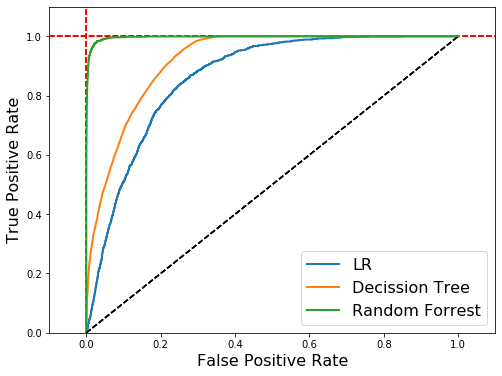

In [178]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.1, 1.1, 0.0, 1.1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.hlines(1,-0.1,1.1,colors='r', linestyles='dashed')
    plt.vlines(0,0.0,1.1,colors='r', linestyles='dashed')
    
    

fpr_clf_0, tpr_clf_0, thresholds_clf_0 = roc_curve(y_test, y_scores_0)
fpr_clf_1, tpr_clf_1, thresholds_clf_1 = roc_curve(y_test, y_scores_1)
fpr_clf_2, tpr_clf_2, thresholds_clf_2 = roc_curve(y_test, y_scores_2)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_clf_0, tpr_clf_0, "LR")
plot_roc_curve(fpr_clf_1, tpr_clf_1, "Decission Tree")
plot_roc_curve(fpr_clf_2, tpr_clf_2, "Random Forrest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
#gs.best_estimator_.fit(X_train, y_train)
plt.plot(X_test, gs.best_estimator_.predict_proba(X_test).T[1])

plt.show()

In [ ]:
#musimy zrobic imputery dla zmiennych numerycznych, kategroycznych i jak cos wymaga specjalnej operacji to funkcji do
#tego, wszystko ma się liczyć automatycznie, z posprzataniem danych wlacznie

In [ ]:
#selektor do wybierania kolumn
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
#imputer do przetwarzania zmiennych o popsutym rozkładzie

class NormalityImputer(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        print('init')
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        for name in self.attribute_names:
            print(name)
            X_copy.loc[(X_copy[name] == 0), name ] = 0.000001
            X_copy[name] = np.log(X_copy[name])
        return X_copy

In [ ]:
#imputer dla zmiennych numerycznych
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = ['Monthly_Income','Loan_Amount_Applied']


num_pipeline = Pipeline([
        ("select_numeric", PowerImputer(numeric_features)),
        #("imputer", SimpleImputer(strategy="median")),
    ])

In [ ]:
income_fixed = num_pipeline.fit_transform(X)
#income_fixed['Monthly_Income'].describe()
income_fixed['Monthly_Income'].describe()

In [ ]:
np.log(0.00001)

In [ ]:
income_fixed['Monthly_Income'].skew()
income_fixed['Loan_Tenure_Applied'].skew()

In [ ]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(income_fixed['Monthly_Income'],bins=100)
plt.yscale('log')
#plt.xscale('log')

In [ ]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)), 
                 ('preprocessing', StandardScaler()), 
                 ('classifier', SVC())])

param_grid = {
            'imputer__strategy': ['mean', 'median', 'most_frequent'],
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

In [ ]:
#moduelujemy najpierw bez automatycznego preprocessingu - imputerow
gs.best_estimator_

In [ ]:
from sklearn import  metrics


models = []
models.append(('Logistic Regression', best_classifier[0].best_estimator_))
models.append(('Random Forrest', best_classifier[1].best_estimator_))
#models.append(('SVC RBF', best_classifier[2].best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("auc_score: {}".format( metrics.roc_auc_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test, model.predict(X_test)))

In [ ]:

import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Logistic Regression','Random Forrest'])
df

In [ ]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha = 0.3, figsize = (50,50), diagonal = 'kde');



In [ ]:
import seaborn as sns
indices = [52, 70, 77]
percentiles_data = X.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]

sns.heatmap(percentiles_samples, annot=True)

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
dcorr = X.corr()
sns.heatmap(dcorr, xticklabels=dcorr.columns,yticklabels=dcorr.columns, square=True, annot=True,cbar=False)

In [ ]:
from joblib import dump, load
dt_clf = load('model_1592240498.3423219_.joblib')

In [ ]:
dt_clf.best_estimator_.steps[1][1]

In [ ]:
#feature importance for random forrest
def plot_feature_importances(model, data):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(20, 200))
plot_feature_importances(best_classifier[1].best_estimator_.steps[1][1], X)
plt.show()

In [ ]:
X.columns